## SF crime data analysis and modeling

### This notebook is about using Spark SQL for big data analysis on SF crime data. (The data source is at: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry).

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# below code only execute once
#import urllib.request
#urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/sf_03_18.csv")
#dbutils.fs.mv("file:/tmp/sf_03_18.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
#display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
## or download directly
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD #463M of data size


In [0]:
data_path = "dbfs:/data/sf_03_18.csv"
# use this file name later

In [0]:
# read data from the data storage
crime_data_lines = sc.textFile(data_path)
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
print(header)

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(3))

#get the total number of data 
print(crimes.count())


_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41191202732877,37.77520656149669,POINT (-122.41191202732877 37.77520656149669),18036228907023
180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.41925789481357,37.77514629165388,POINT (-122.41925789481357 37.77514629165388),18036094864020
180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087926150


##2.2Million line of data, 13 columns (features)

### Solove  big data issues via Spark

Get dataframe and sql method1 with SparkSession

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)#data_path
p_df_opt1 = df_opt1.toPandas() #to Pandas dataframe
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41191202732877,37.77520656149669,POINT (-122.41191202732877 37.77520656149669),18036228907023
180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.41925789481357,37.77514629165388,POINT (-122.41925789481357 37.77514629165388),18036094864020
180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087926150
180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965010
180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965015
180360829,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,05/15/2018,01:27,MISSION,NONE,700 Block of SHOTWELL ST,-122.41561725232026,37.75641376904809,POINT (-122.41561725232026 37.75641376904809),18036082965016
180360835,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083503074
180360835,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083516710
180360794,LIQUOR LAWS,MISCELLANEOUS LIQOUR LAW VIOLATION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079417030
180360794,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079462050


Get dataframe and sql method2 (convert from RDD)

In [0]:
df_opt2 = crimes.toDF(list(header))
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.41191202732877,37.77520656149669,POINT (-122.41191202732877 37.77520656149669),18036228907023
180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.41925789481357,37.77514629165388,POINT (-122.41925789481357 37.77514629165388),18036094864020
180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087926150
180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965010
180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.41781255878655,37.757100579642824,POINT (-122.41781255878655 37.757100579642824),18036087965015
180360829,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,05/15/2018,01:27,MISSION,NONE,700 Block of SHOTWELL ST,-122.41561725232026,37.75641376904809,POINT (-122.41561725232026 37.75641376904809),18036082965016
180360835,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083503074
180360835,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Tuesday,05/15/2018,01:25,SOUTHERN,"ARREST, BOOKED",0 Block of 6TH ST,-122.41004163181597,37.781953653725715,POINT (-122.41004163181597 37.781953653725715),18036083516710
180360794,LIQUOR LAWS,MISCELLANEOUS LIQOUR LAW VIOLATION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079417030
180360794,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,05/15/2018,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.44776112231955,37.76984648754153,POINT (-122.44776112231955 37.76984648754153),18036079462050


In [0]:
#df_opt1.select('Y').toPandas().sort_values('Y', ascending=False).head()

#### Count the number of crimes for different category (OLAP):

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [0]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


##Visualize results

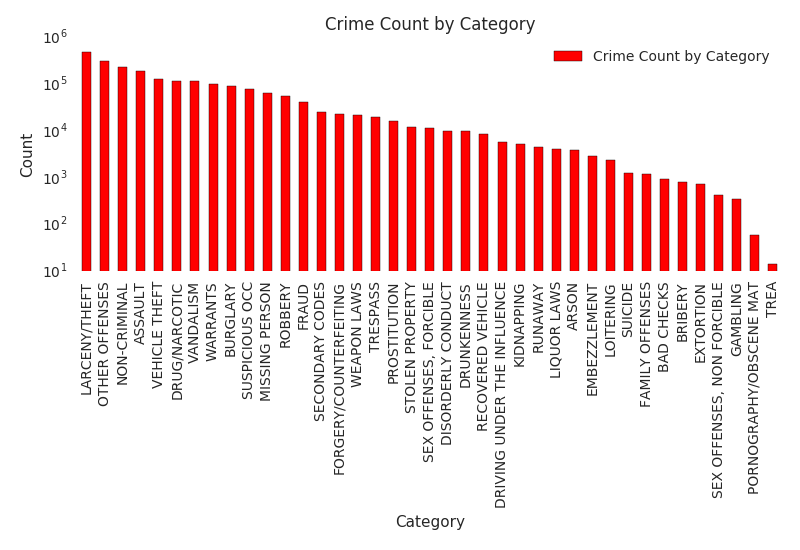

In [0]:
Q1_pdDF = crimeCategory.toPandas() #convert spark dataframe to pandas dataframe, for easier plotting
plt.clf() 
Q1_pdDF.plot(x='category', y='Count', kind='bar', rot=0,  color='r', label = 'Crime Count by Category', logy = True)
objects= Q1_pdDF['category']
y_pos = np.arange(len(objects))
plt.legend(loc ='upper right')
plt.title('Crime Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(y_pos, objects, rotation=90)
plt.tight_layout() #important to show whole x-tick 
display()

##The category dependency shows highest crime activity are "Theft & Burglary", "assault",  "Drug" and "Vandalism".

#### Count the number of crimes for different district, and visualize your results(OLAP)

In [0]:
q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False)
display(q2_result)


PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
crimeDistrict = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


##Visualize results

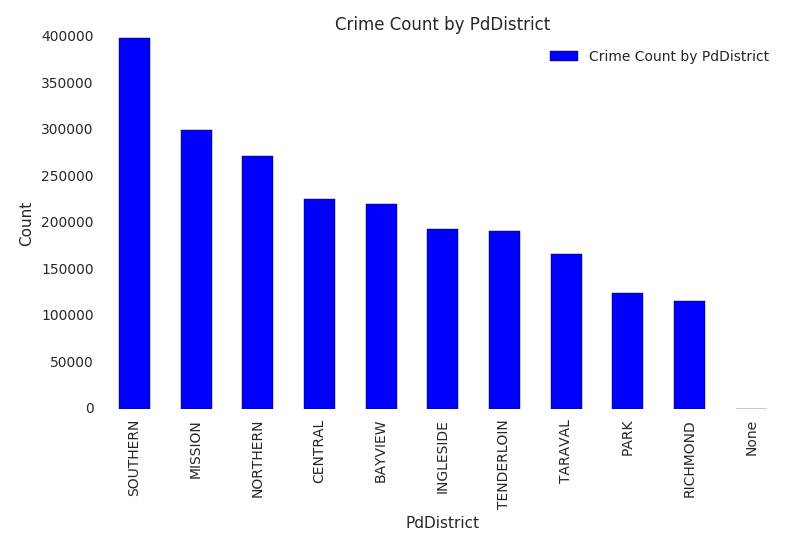

In [0]:
Q2_pdDF = crimeDistrict.toPandas() #convert spark dataframe to pandas dataframe, for easier plotting
plt.clf() 
Q2_pdDF.plot(x='PdDistrict', y='Count', kind='bar', rot=0,  color='b', label = 'Crime Count by PdDistrict')
objects= Q2_pdDF['PdDistrict']
y_pos = np.arange(len(objects))
plt.legend(loc ='upper right')
plt.title('Crime Count by PdDistrict')
plt.xlabel('PdDistrict')
plt.ylabel('Count')
plt.xticks(y_pos, objects, rotation=90)
plt.tight_layout() #important to show whole x-tick 
display()

##Distrcit dependency of crime count shows that there is high crime in "SOUTHERN", "MISSION" and "NORTHERN" districts. While "TRAVAL", "PARK" and "RICHMOND" have lower crime count.

#### Count the number of crimes each "Sunday" at "SF downtown" (OLAP)

In [0]:
import math
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def sf_downtown(lat, lon):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = (37.783333, -122.416667) #center of SF Downtown
    lat2, lon2 = float(lat), float(lon) #convernt string to float
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a)) / 1000  #in kilometer

udf_sf_downtown = udf(sf_downtown, FloatType()) #UDF type claim

df_opt1[(df_opt1['DayOfWeek'] == 'Sunday') & (df_opt1['Y'] != '90')].select('Y','X', udf_sf_downtown('Y', 'X').alias('Distance to center of downtown')).describe().show() #test the UDF in calcuating the distance. Y = 90 is outlier data, thus exclude. 

+-------+--------------------+-------------------+------------------------------+
summary| Y| X|Distance to center of downtown|
+-------+--------------------+-------------------+------------------------------+
 count| 294576| 294576| 294576|
 mean| 37.767768280686774|-122.42293089621194| 3.0838131611005877|
 stddev|0.024225497607848753|0.02542850830168152| 2.459527264971509|
 min| 37.7079219034586| -122.36493749408| 0.00468284|
 max| 37.81997549229705|-122.51364206426544| 10.477222|
+-------+--------------------+-------------------+------------------------------+

In [0]:
Q3_df = df_opt1[df_opt1['DayOfWeek'] == 'Sunday'].filter(udf_sf_downtown('Y', 'X') < 4).groupBy('Date').count()
display(Q3_df)


Date,count
11/17/2013,266
12/13/2009,186
07/24/2005,246
06/26/2005,334
12/26/2004,167
11/20/2011,211
05/31/2009,206
05/17/2009,317
03/18/2007,248
12/19/2004,264


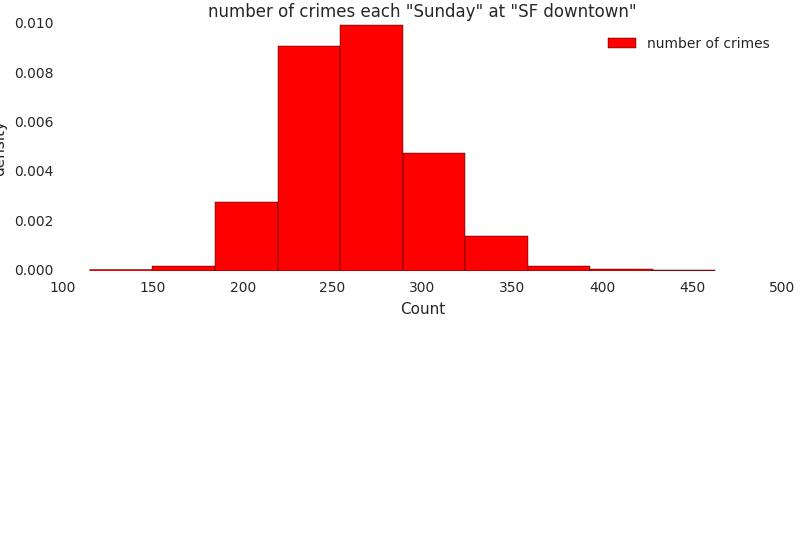

In [0]:
Q3_p_df = Q3_df.toPandas()
plt.clf() 
plt.hist(Q3_p_df['count'].values, color='r', label = 'number of crimes', normed = True)
plt.legend(loc ='upper right')
plt.title('number of crimes each "Sunday" at "SF downtown"')
plt.xlabel('Count')
plt.ylabel('density')
display()

##Here we define SF downtown as long as location is within 4km from the center of the downwon. The count of crime activity on sunday in the downtown is within 200 to 300.

#### Analysis the number of crime in each month of 2015, 2016, 2017, 2018.

In [0]:
crimeMonth = spark.sql('''
                       SELECT  
                       year(TO_DATE(CAST(UNIX_TIMESTAMP(date, 'MM/dd/yyyy') AS TIMESTAMP))) as year, 
                       month(TO_DATE(CAST(UNIX_TIMESTAMP(date, 'MM/dd/yyyy') AS TIMESTAMP))) as month, 
                       COUNT(*) AS Count 
                       FROM sf_crime 
                       WHERE year(TO_DATE(CAST(UNIX_TIMESTAMP(date, 'MM/dd/yyyy') AS TIMESTAMP))) BETWEEN 2015 AND 2018 
                       GROUP BY 1, 2 ORDER BY 1,2
                       ''')
display(crimeMonth)

year,month,Count
2015,1,13606
2015,2,12329
2015,3,13929
2015,4,12959
2015,5,13729
2015,6,13304
2015,7,13365
2015,8,13730
2015,9,12896
2015,10,13147


##From the month study for year 2015-2018, we can see that there is slightly higher crime in spring, from January to April. Please note that here we miss some data for 2018.

#### Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give travel suggestion to visit SF.  (OLAP)

In [0]:
crimeHour = spark.sql('''
                      SELECT  substring(time, 1, 2) as hour, COUNT(*) AS Count 
                      FROM sf_crime  
                      where substring(date, 1, 5) = '12/15' 
                      GROUP BY hour ORDER BY hour
                      ''')
display(crimeHour)

hour,Count
00,320
01,145
02,150
03,72
04,76
05,63
06,81
07,131
08,265
09,267


####Trvel suggestions to visit SF: there is higher crime count at noon time (12pm) and evening time (17-19pm), please stay more alert during those time window when visit SF.

####  Top-3 danger disrict. The crime event w.r.t category and time.  Advice to distribute the police  (OLAP)

In [0]:
TopCrimeDistrict = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC limit 3")
display(TopCrimeDistrict)


PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713


## It can be seen that, 'SOUTHERN' and "MISSION" and "NORTHERN" are the top 3 districts with highest crime.

In [0]:
TopCrimeCategory = spark.sql('''
                             SELECT  category, PdDistrict, COUNT(*) AS Count 
                             FROM sf_crime 
                             where PdDistrict in 
                               (
                                 select PdDistrict from 
                                   (SELECT  PdDistrict, COUNT(*) AS Count 
                                    FROM sf_crime 
                                    GROUP BY PdDistrict 
                                    ORDER BY Count DESC limit 3
                                    )
                               ) 
                             GROUP BY 1, 2 ORDER BY Count DESC
                             ''')
#display(TopCrimeCategory)

In [0]:
display(TopCrimeCategory.take(5))

category,PdDistrict,Count
LARCENY/THEFT,SOUTHERN,113342
LARCENY/THEFT,NORTHERN,80988
OTHER OFFENSES,SOUTHERN,51403
NON-CRIMINAL,SOUTHERN,49821
LARCENY/THEFT,MISSION,48960


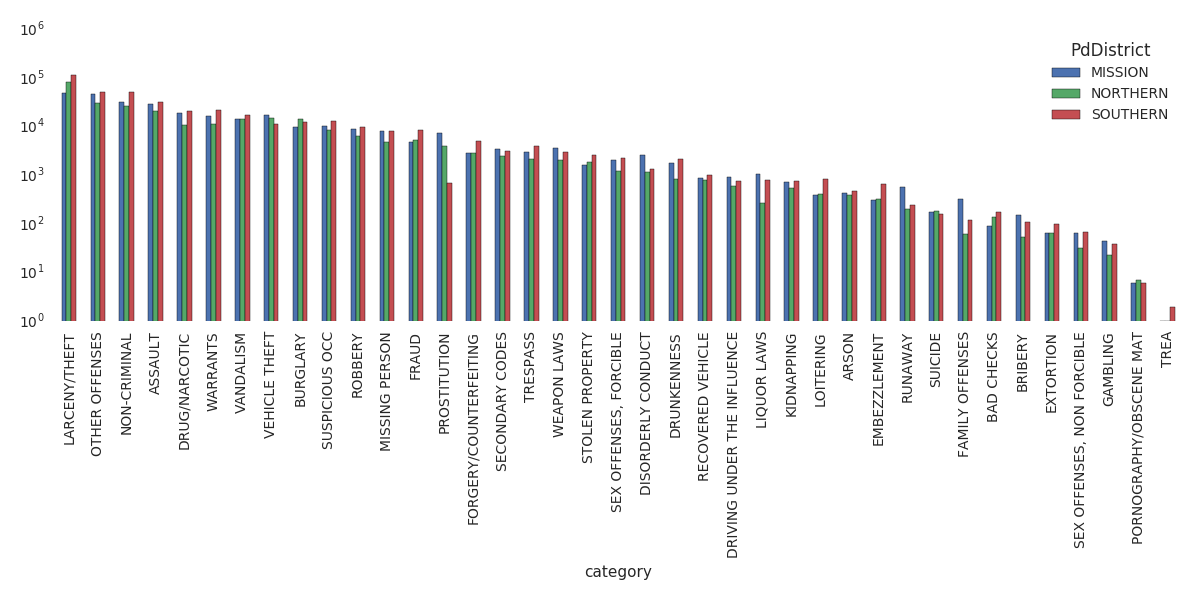

In [0]:
Q6_2_pdDF = TopCrimeCategory.toPandas() #convert spark dataframe to pandas dataframe, for easier plotting
Q6_2_pivot_df = Q6_2_pdDF.pivot_table(index='category', columns='PdDistrict', values='Count')
Q6_2_pivot_df['count_total'] = Q6_2_pivot_df['MISSION'] + Q6_2_pivot_df['NORTHERN'] + Q6_2_pivot_df['SOUTHERN'] #new column 'count_total' for all top 3 district
Q6_2_pivot_df = Q6_2_pivot_df.sort_values('count_total', ascending = False)
Q6_2_pivot_df.loc[:, ['MISSION', 'NORTHERN', 'SOUTHERN']].plot.bar(logy=True, figsize=(12,6))
plt.tight_layout() #important to show whole x-tick 
display()

In [0]:
plt.clf
Q6_2_pivot_df.nsmallest(20, 'count_total').sort_values('count_total', ascending = False).loc[:, ['MISSION', 'NORTHERN', 'SOUTHERN']].plot.bar(stacked=True)
plt.tight_layout() #important to show whole x-tick 
#display()

Top-3 danger district crime w.r.t to hour

In [0]:
TopCrimeHour = spark.sql('''
                         SELECT  substring(time, 1, 2) as hour, PdDistrict, COUNT(*) AS Count 
                         FROM sf_crime  where PdDistrict in 
                         (select PdDistrict from (SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC limit 3)) 
                         and 
                         substring(date, 1, 5) = '12/15' GROUP BY 1, 2 ORDER BY hour''')
display(TopCrimeHour)

hour,PdDistrict,Count
00,MISSION,33
00,SOUTHERN,60
00,NORTHERN,54
01,NORTHERN,29
01,MISSION,31
01,SOUTHERN,27
02,NORTHERN,23
02,MISSION,23
02,SOUTHERN,27
03,SOUTHERN,12


###Advice on police distribution.
###(1)There is high crime count in district of Southern, Mission and Northern, thus suggesting more police allocated to those three districts, especially Southern district. 
###(2) There are higher crime count around noon time(12pm) and evening time(18-19 pm), thus suggesting more police resource around those time.

#### For different category of crime, find the percentage of resolution (OLAP)

In [0]:

crimeCategoryResolution = spark.sql('''
                                    with A as
                                        (
                                        SELECT category, Resolution, COUNT(*) AS Count
                                        FROM sf_crime GROUP BY 1, 2 ORDER BY 1, 2
                                        ),
                                    B as
                                    (SELECT category,sum(count) as sum
                                    FROM A group by 1
                                    )
                                    select a.category, a.Resolution, 100*a.Count/b.sum as percentage
                                    from A left join B on A.category = b.category  
                                    where a.category in 
                                    ('ASSAULT', 'WEAPON LAWS','ROBBERY','PROSTITUTION', 'VANDALISM', 'DRUG/NARCOTIC','VEHICLE THEFT', 'STOLEN PROPERTY', 'LARCENY/THEFT', 'KIDNAPPING','BURGLARY')
                                   '''
                                   )
display(crimeCategoryResolution)

category,Resolution,percentage
ASSAULT,"ARREST, BOOKED",32.260367551131516
ASSAULT,"ARREST, CITED",3.686297471930311
ASSAULT,CLEARED-CONTACT JUVENILE FOR MORE INFO,0.04160374741902678
ASSAULT,COMPLAINANT REFUSES TO PROSECUTE,1.0919699631216164
ASSAULT,DISTRICT ATTORNEY REFUSES TO PROSECUTE,1.3415924476357772
ASSAULT,EXCEPTIONAL CLEARANCE,0.3780291123506631
ASSAULT,JUVENILE ADMONISHED,0.33745261795432835
ASSAULT,JUVENILE BOOKED,1.0020853236360647
ASSAULT,JUVENILE CITED,0.30047150913741566
ASSAULT,JUVENILE DIVERTED,0.018490554408456348


## It can bre seen that there is no resolution for significant percentage of crime, especially for robbery, theft, burglary. Action need to be taken in order to reduce those kind of crimes.

In [0]:
Q7_pdf['category'].unique()

Out[ 145 ]: array(['FRAUD', 'SUICIDE', 'LIQUOR LAWS', 'SECONDARY CODES',
 'FAMILY OFFENSES', 'MISSING PERSON', 'OTHER OFFENSES',
 'DRIVING UNDER THE INFLUENCE', 'WARRANTS', 'ARSON',
 'FORGERY/COUNTERFEITING', 'GAMBLING', 'BRIBERY', 'ASSAULT',
 'DRUNKENNESS', 'EXTORTION', 'TREA', 'WEAPON LAWS', 'LOITERING',
 'SUSPICIOUS OCC', 'ROBBERY', 'SEX OFFENSES, FORCIBLE',
 'PROSTITUTION', 'EMBEZZLEMENT', 'BAD CHECKS', 'DISORDERLY CONDUCT',
 'RUNAWAY', 'RECOVERED VEHICLE', 'VANDALISM', 'DRUG/NARCOTIC',
 'PORNOGRAPHY/OBSCENE MAT', 'TRESPASS', 'NON-CRIMINAL',
 'VEHICLE THEFT', 'STOLEN PROPERTY', 'LARCENY/THEFT', 'KIDNAPPING',
 'BURGLARY', 'SEX OFFENSES, NON FORCIBLE'], dtype=object)

##Apply Spark ML clustering for spatial data analysis

In [0]:
#prepare k-means data
from pyspark.sql.types import FloatType
k_means_data = df_opt1.select('X', 'Y')
k_means_data = k_means_data.withColumn('X', k_means_data['X'].cast(FloatType()))
k_means_data = k_means_data.withColumn('Y', k_means_data['Y'].cast(FloatType()))
k_means_data = k_means_data.filter(k_means_data['Y'] < 40)
display(k_means_data)

X,Y
-122.41191,37.775208
-122.41926,37.775146
-122.417816,37.7571
-122.417816,37.7571
-122.417816,37.7571
-122.41562,37.756413
-122.41004,37.78195
-122.41004,37.78195
-122.44776,37.769848
-122.44776,37.769848


In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

In [0]:
selected =['X', 'Y']
assembler = VectorAssembler(
            inputCols=selected, outputCol='features')
a = assembler.transform(k_means_data).drop(*selected)
display(a)

features
"List(1, 2, List(), List(-122.41191101074219, 37.77520751953125))"
"List(1, 2, List(), List(-122.41925811767578, 37.775146484375))"
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))"
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))"
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))"
"List(1, 2, List(), List(-122.41561889648438, 37.756412506103516))"
"List(1, 2, List(), List(-122.41004180908203, 37.781951904296875))"
"List(1, 2, List(), List(-122.41004180908203, 37.781951904296875))"
"List(1, 2, List(), List(-122.44776153564453, 37.76984786987305))"
"List(1, 2, List(), List(-122.44776153564453, 37.76984786987305))"


In [0]:
# Trains a k-means model.
kmeans = KMeans().setK(10) #use 10 here since there are 10 districts
model = kmeans.fit(a)

# Make predictions
predictions = model.transform(a)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.5439469326929509
Cluster Centers: 
[-122.42563464 37.76534364]
[-122.45611743 37.77346823]
[-122.42896088 37.78974451]
[-122.39264903 37.72952214]
[-122.40903157 37.75395895]
[-122.46688391 37.72635255]
[-122.49250286 37.76284764]
[-122.40439386 37.7968655 ]
[-122.43034893 37.72369269]
[-122.40924418 37.78120483]

In [0]:
predictions.toPandas()

features,prediction
"List(1, 2, List(), List(-122.41191101074219, 37.77520751953125))",9
"List(1, 2, List(), List(-122.41925811767578, 37.775146484375))",0
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))",4
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))",4
"List(1, 2, List(), List(-122.41781616210938, 37.75709915161133))",4
"List(1, 2, List(), List(-122.41561889648438, 37.756412506103516))",4
"List(1, 2, List(), List(-122.41004180908203, 37.781951904296875))",9
"List(1, 2, List(), List(-122.41004180908203, 37.781951904296875))",9
"List(1, 2, List(), List(-122.44776153564453, 37.76984786987305))",1
"List(1, 2, List(), List(-122.44776153564453, 37.76984786987305))",1


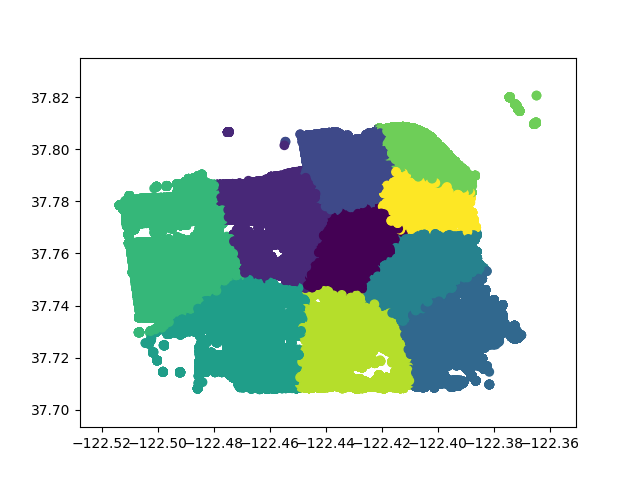

In [0]:
merged_data = pd.concat([k_means_data.toPandas(), predictions.toPandas()], axis = 1)

plt.scatter(merged_data['X'], merged_data['Y'], c=(merged_data['prediction']))
display()


In [0]:
merged_data.head()

,X,Y,features,prediction
0,-122.411911,37.775208,"[-122.41191101074219, 37.77520751953125]",9
1,-122.419258,37.775146,"[-122.41925811767578, 37.775146484375]",0
2,-122.417816,37.757099,"[-122.41781616210938, 37.75709915161133]",4
3,-122.417816,37.757099,"[-122.41781616210938, 37.75709915161133]",4
4,-122.417816,37.757099,"[-122.41781616210938, 37.75709915161133]",4


#Conclusion
Crime is existing in modern society and has been impacting many people's life. San Francisco police department has been reporting and upating the crime dataset. In this work, the dataset with large size of >500MB is analyzed using big data tools Spark. Spark SQL and Dataframe are both used for the data cleaning, processing and OLAP. Spark built in display tool and PyPlot are both used for data visulization. Through analysis of the data, significant amout of information on crime activity like seasonal trend, hourly dependency, location dependency can be extracted. Thorough analysis of the data can help allocate police resource, alert residents and travelers, and evently reduce the crime activity.